In [1]:
import pandas as pd

In [2]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [3]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements-out.csv", nrows=10)
df.head()

,Captured Time,Latitude,Longitude,Value,Unit,Location Name,Device ID,MD5Sum,Height,Surface,Radiation,Uploaded Time,Loader ID
0,2021-03-14 01:59:55,42.106730,-71.712807,14,cpm,"74 Barnett Rd, Sutton,MA 01590",19,0c501c6cf1064311d5bd940d839d955d,0,Concrete Basement,NaN,2021-03-14 01:59:55.024864,NaN
1,2021-03-14 01:59:30,1.809340,41.235100,33,cpm,NaN,233,50fee0de5448d8d7d0ad63426b54c7f1,66,NaN,NaN,2021-03-14 01:59:31.149397,NaN
2,2021-03-14 01:28:59,41.259708,-73.823212,14,cpm,NaN,330302,96208ab6252016cd58a0e5d489a20f7d,130,NaN,NaN,2021-03-14 01:59:25.670692,NaN
3,2021-03-14 01:48:59,41.259708,-73.823212,13,cpm,NaN,330302,72af8d6ac8dfdaf9f739160cdb6bca88,130,NaN,NaN,2021-03-14 01:59:25.669101,NaN
4,2021-03-14 01:18:59,41.259708,-73.823212,14,cpm,NaN,330302,4dd670bd97422cdf0625a9d41db6c179,130,NaN,NaN,2021-03-14 01:59:25.654735,NaN


In [4]:
df = pd.read_csv(f"{ORIGINAL_DIR}measurements-out.csv", usecols=[0, 1, 2, 3, 4])

In [5]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  160212270


In [6]:
df.head()

,Captured Time,Latitude,Longitude,Value,Unit
0,2021-03-14 01:59:55,42.106730,-71.712807,14.0,cpm
1,2021-03-14 01:59:30,1.809340,41.235100,33.0,cpm
2,2021-03-14 01:28:59,41.259708,-73.823212,14.0,cpm
3,2021-03-14 01:48:59,41.259708,-73.823212,13.0,cpm
4,2021-03-14 01:18:59,41.259708,-73.823212,14.0,cpm


In [7]:
# Drop any NA
df.dropna(axis=0, how='any', inplace=True)

In [8]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  160118607


In [9]:
df.head()

,Captured Time,Latitude,Longitude,Value,Unit
0,2021-03-14 01:59:55,42.106730,-71.712807,14.0,cpm
1,2021-03-14 01:59:30,1.809340,41.235100,33.0,cpm
2,2021-03-14 01:28:59,41.259708,-73.823212,14.0,cpm
3,2021-03-14 01:48:59,41.259708,-73.823212,13.0,cpm
4,2021-03-14 01:18:59,41.259708,-73.823212,14.0,cpm


In [10]:
pd.unique(df.Unit) 

array(['cpm', 'status', 'celcius', 'usv', '211', 'uSv/hr', 'CPM',
       'Inspector', 'HUMD%', 'PM10', 'PM2.5', 'PM1', 'TEMPC', 'usv/hr',
       'NOXppm', 'pm2.5', 'DeviceType2', 'DeviceType1', 'uSv/h', 'uSv',
       'Cpm', ' cpm', 'microsievert', '1', '0', 'RSSI'], dtype=object)

In [11]:
df[df.Unit == 'cpm'].shape[0]

146734917

In [12]:
df[df.Unit == 'usv'].shape[0]

329584

In [13]:
df[df.Unit == 'uSv/hr'].shape[0]

11

In [14]:
df[df.Unit == 'CPM'].shape[0]

291

In [15]:
df[df.Unit == 'usv/hr'].shape[0]

43

In [16]:
df[df.Unit == 'uSv/h'].shape[0]

43

In [17]:
df[df.Unit == 'uSv'].shape[0]

14

In [18]:
df[df.Unit == 'Cpm'].shape[0]

55

In [19]:
df[df.Unit == ' cpm'].shape[0]

10043

In [20]:
df[df.Unit == 'microsievert'].shape[0]

30096

In [21]:
# Keeping only cpm (counts per minutes)
df = df[df.Unit == 'cpm']

In [22]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  146734917


In [23]:
df.head()

,Captured Time,Latitude,Longitude,Value,Unit
0,2021-03-14 01:59:55,42.106730,-71.712807,14.0,cpm
1,2021-03-14 01:59:30,1.809340,41.235100,33.0,cpm
2,2021-03-14 01:28:59,41.259708,-73.823212,14.0,cpm
3,2021-03-14 01:48:59,41.259708,-73.823212,13.0,cpm
4,2021-03-14 01:18:59,41.259708,-73.823212,14.0,cpm


In [24]:
# Renaming columns
df.columns = ['datetime', 'latitude', 'longitude', 'radiation', 'unit']

In [25]:
df.head()

,datetime,latitude,longitude,radiation,unit
0,2021-03-14 01:59:55,42.106730,-71.712807,14.0,cpm
1,2021-03-14 01:59:30,1.809340,41.235100,33.0,cpm
2,2021-03-14 01:28:59,41.259708,-73.823212,14.0,cpm
3,2021-03-14 01:48:59,41.259708,-73.823212,13.0,cpm
4,2021-03-14 01:18:59,41.259708,-73.823212,14.0,cpm


In [26]:
# Convert cpm to µSv/h
# http://safecast.org/tilemap/methodology.html
df.radiation = df.radiation / 350

In [27]:
df.head()

,datetime,latitude,longitude,radiation,unit
0,2021-03-14 01:59:55,42.106730,-71.712807,0.040000,cpm
1,2021-03-14 01:59:30,1.809340,41.235100,0.094286,cpm
2,2021-03-14 01:28:59,41.259708,-73.823212,0.040000,cpm
3,2021-03-14 01:48:59,41.259708,-73.823212,0.037143,cpm
4,2021-03-14 01:18:59,41.259708,-73.823212,0.040000,cpm


In [28]:
# Keep only positive values
df = df[df.radiation > 0]

In [29]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


In [30]:
df.drop(df.columns.difference(['datetime','latitude', 'longitude','radiation']), 1, inplace=True)

In [31]:
df.head()

,datetime,latitude,longitude,radiation
0,2021-03-14 01:59:55,42.106730,-71.712807,0.040000
1,2021-03-14 01:59:30,1.809340,41.235100,0.094286
2,2021-03-14 01:28:59,41.259708,-73.823212,0.040000
3,2021-03-14 01:48:59,41.259708,-73.823212,0.037143
4,2021-03-14 01:18:59,41.259708,-73.823212,0.040000


In [32]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


**Validate latitude and longitude**

In [33]:
lat = df["latitude"]
max_lat = lat.max()
min_lat = lat.min()
print(max_lat)
print(min_lat)

90.0
-90.0


In [34]:
lon = df["longitude"]
max_lon = lon.max()
min_lon = lon.min()
print(max_lon)
print(min_lon)

179.998746666667
-179.998601666667


In [35]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-00.csv", index=False)

**Part 2**

In [2]:
import pandas as pd
import numpy as np

In [3]:
ORIGINAL_DIR = "../Original-Data/"
ANALYSIS_DIR = "../Analysis-Data/"

In [4]:
dtypes = {'latitude': np.float32, 'longitude': np.float32, 'radiation': np.float32}

In [5]:
df = pd.read_csv(f"{ANALYSIS_DIR}measurements-out-2903-00.csv", dtype=dtypes)
df.head()

,datetime,latitude,longitude,radiation
0,2021-03-14 01:59:55,42.106731,-71.712807,0.040000
1,2021-03-14 01:59:30,1.809340,41.235100,0.094286
2,2021-03-14 01:28:59,41.259708,-73.823212,0.040000
3,2021-03-14 01:48:59,41.259708,-73.823212,0.037143
4,2021-03-14 01:18:59,41.259708,-73.823212,0.040000


In [6]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084949


In [7]:
df['datetime'].min()

'0019-08-23 22:48:03'

In [8]:
df['datetime'].max()

'6017-02-17 09:54:14'

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [10]:
df['datetime'].min()

Timestamp('1970-01-01 00:01:45')

In [11]:
df['datetime'].max()

Timestamp('2080-01-12 21:54:49')

In [12]:
# Drop any NA
df.dropna(axis=0, how='any', inplace=True)

In [13]:
df.head()

,datetime,latitude,longitude,radiation
0,2021-03-14 01:59:55,42.106731,-71.712807,0.040000
1,2021-03-14 01:59:30,1.809340,41.235100,0.094286
2,2021-03-14 01:28:59,41.259708,-73.823212,0.040000
3,2021-03-14 01:48:59,41.259708,-73.823212,0.037143
4,2021-03-14 01:18:59,41.259708,-73.823212,0.040000


In [14]:
print('Number of measurements: ', df.shape[0])

Number of measurements:  145084932


In [16]:
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

In [17]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  145084932


,datetime,latitude,longitude,radiation
0,2021-03-14,42.106731,-71.712807,0.040000
1,2021-03-14,1.809340,41.235100,0.094286
2,2021-03-14,41.259708,-73.823212,0.040000
3,2021-03-14,41.259708,-73.823212,0.037143
4,2021-03-14,41.259708,-73.823212,0.040000


In [18]:
df = df[df.datetime < pd.to_datetime('2021-03-15')]

In [22]:
df['datetime'].min()

datetime.date(1970, 1, 1)

In [23]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  145066258


,datetime,latitude,longitude,radiation
0,2021-03-14,42.106731,-71.712807,0.040000
1,2021-03-14,1.809340,41.235100,0.094286
2,2021-03-14,41.259708,-73.823212,0.040000
3,2021-03-14,41.259708,-73.823212,0.037143
4,2021-03-14,41.259708,-73.823212,0.040000


In [24]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-01.csv", index=False)

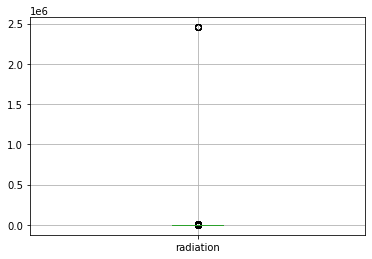

In [25]:
boxplot = df.boxplot(column=['radiation'])

In [26]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['radiation'].quantile(.25)
Q3 = df['radiation'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['radiation'].between(q1, q3)]

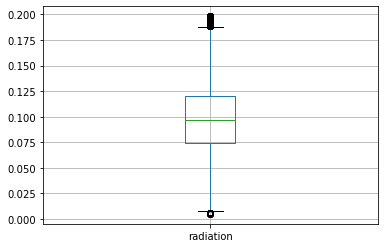

In [27]:
boxplot = df.boxplot(column=['radiation'])

In [28]:
print('Number of measurements: ', df.shape[0])
df.head()

Number of measurements:  135786902


,datetime,latitude,longitude,radiation
0,2021-03-14,42.106731,-71.712807,0.040000
1,2021-03-14,1.809340,41.235100,0.094286
2,2021-03-14,41.259708,-73.823212,0.040000
3,2021-03-14,41.259708,-73.823212,0.037143
4,2021-03-14,41.259708,-73.823212,0.040000


In [29]:
df['radiation'].min()

0.004942857

In [31]:
df['radiation'].max()

0.19828571

In [32]:
df.to_csv(f"{ANALYSIS_DIR}measurements-out-2903-q1q3.csv", index=False)

**Visualization**

In [33]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook, show

In [34]:
plot_width  = int(800)
plot_height = int(plot_width//1.2)

In [35]:
def draw_map(df, plot_width, plot_height, colors, agg_func, interp, background_col):
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df, 'longitude', 'latitude',  agg_func('radiation'))
    img = tf.shade(agg, cmap=colors, how=interp)
    return tf.set_background(img, color=background_col)

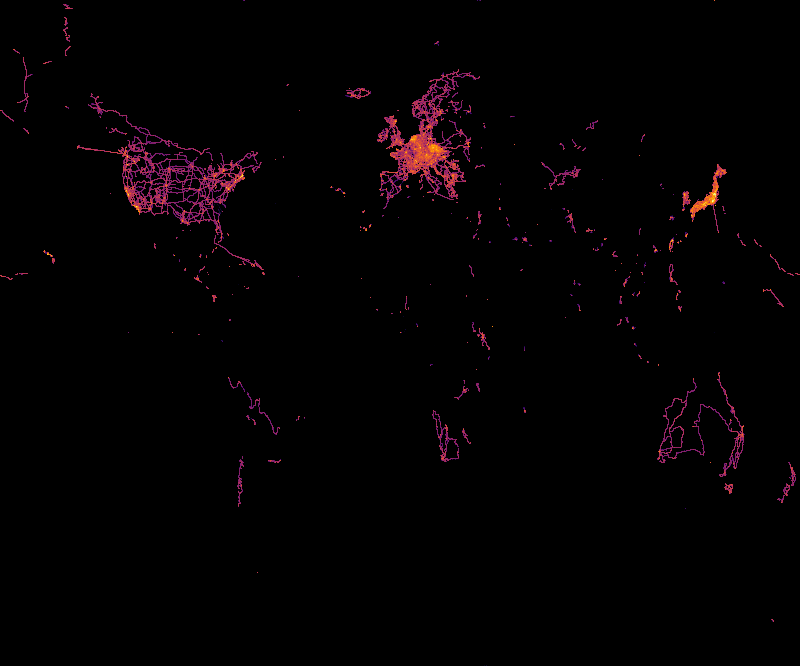

In [36]:
img = draw_map(df, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [38]:
x_min_jpn, y_min_jpn, x_max_jpn, y_max_jpn = 128.03, 30.22, 148.65, 45.83
df_jpn = df[(df.longitude > x_min_jpn) & (df.longitude < x_max_jpn) & (df.latitude > y_min_jpn) & (df.latitude < y_max_jpn)]

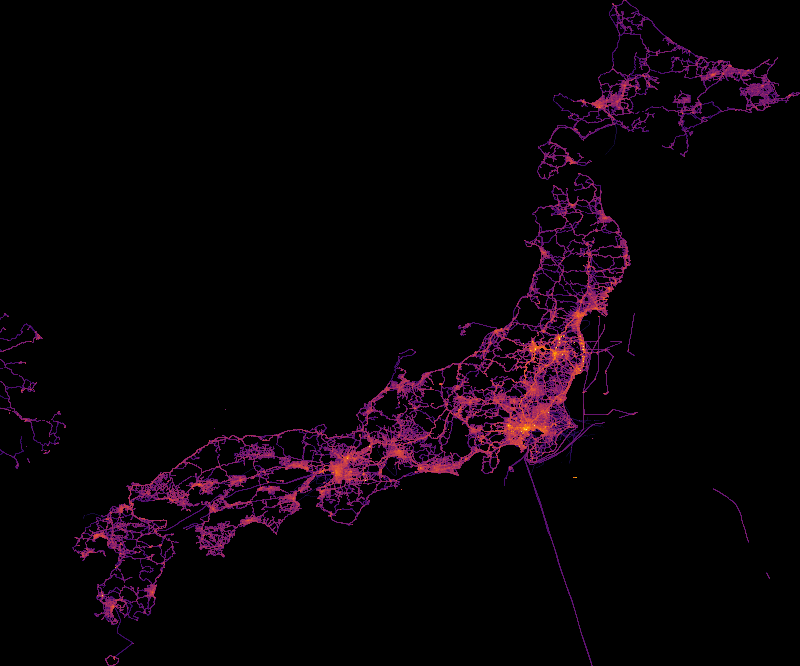

In [39]:
img = draw_map(df_jpn, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img

In [42]:
x_min_fk, y_min_fk, x_max_fk, y_max_fk = 140.0166, 37.0047, 141.2251, 38.195
df_fk = df[(df.longitude > x_min_fk) & (df.longitude < x_max_fk) & (df.latitude > y_min_fk) & (df.latitude < y_max_fk)]

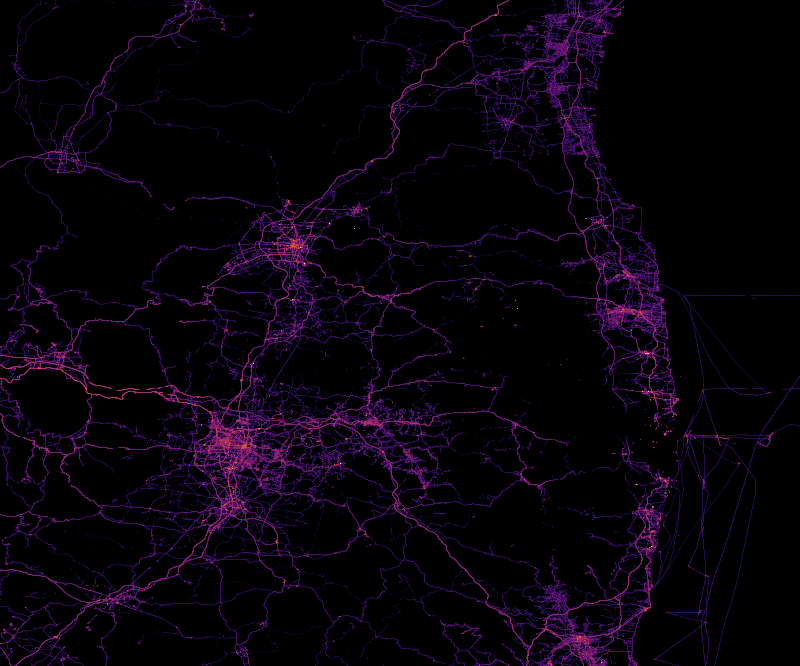

In [43]:
img = draw_map(df_fk, plot_width, plot_height, inferno, ds.count, 'log', 'black')
img